In [283]:
import warnings
warnings.filterwarnings('ignore')

In [284]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
import pandas as pd 
import numpy as np
import scipy 

pd.set_option('display.max_columns', None)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt 
import matplotlib._color_data as mcd
import seaborn as sns 

import random
pd.set_option('use_inf_as_na',True)

In [286]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [279]:
#colors 
overlap = [name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS]
op = ['grey','lightblue','ivory','khaki','beige', 'wheat','white','yellow','yellowgreen', 'sienna','silver']
colors = [e for e in overlap if e not in op]

In [280]:
data = pd.read_csv("/content/drive/MyDrive/Artificial Intelligence Thinking/Projects/US_final.csv")
data1 = pd.DataFrame()

In [281]:
data1['year'] = data['year']

In [282]:
columns = data.columns[2:-1].tolist()

In [287]:
#Create DataFrame for each column 
# Change datatype to pandas datetime
indexed_df_list = []
c = []
for i in range(len(columns)):
  testlist = data[columns[i]].values.tolist()
  c.append(testlist)
for i in range(len(c)): 
  df = pd.DataFrame()
  df[columns[i]] = c[i]
  df['date'] = pd.to_datetime(data1['year'], format='%Y')
  indexed_df =df.set_index('date')
  indexed_df_list.append(indexed_df)

In [288]:
indexed_df_list[0].head(3)

,population
date,
1900-01-01,78763706.0
1901-01-01,80336086.0
1902-01-01,81949920.0


In [356]:
def f(x):

  for i in range(len(indexed_df_list)):
    if x == columns[i]:
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_df_list[i],color=random.choice(colors), label=columns[i])
        plt.title(columns[i].capitalize() + ' vs Year', weight='bold')
        plt.ylabel(columns[i], fontsize=10)
        plt.xlabel("year", fontsize= 10)
        plt.legend()
        plt.show()  

interact(f, x= columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [290]:
rolmean_list = []
rolstd_list = []
#Determine rolling average and standard deviation
#Window of 5 years 
for df in indexed_df_list:
  rm = df.rolling(window=2).mean()
  rolmean_list.append(rm)
  rstd = df.rolling(window=2).std()
  rolstd_list.append(rstd)

print (rolmean_list[0], rolstd_list[0])

             population
date                   
1900-01-01          NaN
1901-01-01   79549896.0
1902-01-01   81143003.0
1903-01-01   82778080.0
1904-01-01   84451124.0
...                 ...
2017-01-01  324050368.0
2018-01-01  326090496.0
2019-01-01  328080576.0
2020-01-01  330033776.0
2021-01-01  331958864.0

[122 rows x 1 columns]               population
date                    
1900-01-01           NaN
1901-01-01  1.111841e+06
1902-01-01  1.141153e+06
1903-01-01  1.171195e+06
1904-01-01  1.194846e+06
...                  ...
2017-01-01  1.462817e+06
2018-01-01  1.422359e+06
2019-01-01  1.392039e+06
2020-01-01  1.370203e+06
2021-01-01  1.352282e+06

[122 rows x 1 columns]


In [357]:
def f(x):

  for i in range(len(indexed_df_list)):
    if x == columns[i]:
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_df_list[i],color=random.choice(colors), label=columns[i])
        plt.plot(rolmean_list[i],color=random.choice(colors), label=columns[i] + ' rolling mean')
        plt.plot(rolstd_list[i],color=random.choice(colors), label=columns[i] + ' rolling std')
        plt.title(columns[i].capitalize() + ' vs Year', weight='bold')
        plt.ylabel(columns[i], fontsize=10)
        plt.xlabel("year", fontsize= 10)
        plt.legend()
        plt.show()  

interact(f, x= columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [292]:
from statsmodels.tsa.stattools import adfuller

adfuller_list = []
for i in range(len(indexed_df_list)):
  dftest = adfuller(indexed_df_list[i].iloc[:,0], autolag= 'AIC')

  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags','Number of Observations'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  adfuller_list.append(dfoutput)

In [358]:
def f(x):
  for i in range(len(columns)):
    if x == columns[i]:
      print (columns[i], "\n\n", adfuller_list[i])

interact( f, x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [294]:
indexed_dataset_log_sqrt_Scale_list = []
for i in range(len(indexed_df_list)):
  indexed_dataset_logScale = np.sqrt(np.log(indexed_df_list[i]))
  indexed_dataset_log_sqrt_Scale_list.append(indexed_dataset_logScale)

In [295]:
indexed_dataset_log_sqrt_Scale_list[0]

,population
date,
1900-01-01,4.264031
1901-01-01,4.266348
1902-01-01,4.268679
1903-01-01,4.271022
1904-01-01,4.273364
...,...
2017-01-01,4.427143
2018-01-01,4.427840
2019-01-01,4.428517


In [359]:
def f(x):

  for i in range(len(indexed_df_list)):
    if x == columns[i]:
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_dataset_log_sqrt_Scale_list[i],color=random.choice(colors), label=columns[i] + ' log sqrt')
        plt.title(columns[i].capitalize() + ' vs Year', weight='bold')
        plt.ylabel(columns[i], fontsize=10)
        plt.xlabel("year", fontsize= 10)
        plt.legend()
        plt.show()  

interact(f, x= columns)


interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [297]:
log_rolmean_list = []
log_rolstd_list = []
#Determine rolling average and standard deviation
#Window of 5 years 
for df in indexed_dataset_log_sqrt_Scale_list:
  rm = df.rolling(window=2).mean()
  log_rolmean_list.append(rm)
  rstd = df.rolling(window=2).std()
  log_rolstd_list.append(rstd)

print (log_rolmean_list[0], log_rolstd_list[0])

            population
date                  
1900-01-01         NaN
1901-01-01    4.265190
1902-01-01    4.267514
1903-01-01    4.269850
1904-01-01    4.272193
...                ...
2017-01-01    4.426783
2018-01-01    4.427491
2019-01-01    4.428179
2020-01-01    4.428849
2021-01-01    4.429505

[122 rows x 1 columns]             population
date                  
1900-01-01         NaN
1901-01-01    0.001639
1902-01-01    0.001648
1903-01-01    0.001657
1904-01-01    0.001656
...                ...
2017-01-01    0.000510
2018-01-01    0.000493
2019-01-01    0.000479
2020-01-01    0.000469
2021-01-01    0.000460

[122 rows x 1 columns]


In [360]:
def f(x):

  for i in range(len(indexed_df_list)):
    if x == columns[i]:
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_dataset_log_sqrt_Scale_list[i],color=random.choice(colors), label= "Log sqrt " + columns[i])
        plt.plot(log_rolmean_list[i],color=random.choice(colors), label= "Log sqrt " + columns[i] + ' rolling mean')
        plt.title("Log Scaled" + columns[i].capitalize() + ' vs Year', weight='bold')
        plt.ylabel(columns[i], fontsize=10)
        plt.xlabel("year", fontsize= 10)
        plt.legend()
        plt.show()  

interact(f, x= columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [299]:
indexed_dataset_logScale_minus_MA_list = []
for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
  indexed_dataset_logScale_minus_MA = indexed_dataset_log_sqrt_Scale_list[i] - log_rolmean_list[i]
  indexed_dataset_logScale_minus_MA.dropna(inplace=True)
  indexed_dataset_logScale_minus_MA_list.append(indexed_dataset_logScale_minus_MA)

In [300]:
def test_stationarity(timeseries):
  
  #Determine Rolling Statistic 
  moving_Average = timeseries.rolling(window=2).mean()
  moving_STD = timeseries.rolling(window=2).std()

  #plot rolling statistics
  plt.figure(figsize=(15,6), dpi=80)
  orginal = plt.plot(timeseries, color=random.choice(colors), label="Original")
  mean = plt.plot(moving_Average, color=random.choice(colors), label="Mean")
  std = plt.plot(moving_STD, color=random.choice(colors), label="Standard Deviation")
  plt.legend()
  plt.show()

  #Adfuller Test 
  print ("Adfuller Test:") 
  dftest = adfuller(timeseries, autolag= 'AIC')

  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags','Number of Observations'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
     

In [361]:
def f(x):
  for i in range(len(indexed_dataset_logScale_minus_MA_list)):
    if x == columns[i]:
      test_stationarity(indexed_dataset_logScale_minus_MA_list[i])
interact(f, x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [302]:
exponential_Decay_Weighted_Average_list = []
for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
  EDWA = indexed_dataset_log_sqrt_Scale_list[i].ewm(halflife=1, min_periods=0, adjust=True).mean()
  exponential_Decay_Weighted_Average_list.append(EDWA)

In [362]:
def f(x):
  for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
    if x == columns[i]:
      plt.figure(figsize=(15,6), dpi=80)
      plt.plot(indexed_dataset_log_sqrt_Scale_list[i],label = 'log')
      plt.plot(exponential_Decay_Weighted_Average_list[i], label='log EDWA')
      plt.legend()

interact(f,x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [304]:
indexed_dataset_logScale_minus_Exponential_Decay_MA_list = []
for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
  logscaled_Minu_EDMA = indexed_dataset_log_sqrt_Scale_list[i] - exponential_Decay_Weighted_Average_list[i]
  logscaled_Minu_EDMA.dropna(inplace=True)
  indexed_dataset_logScale_minus_Exponential_Decay_MA_list.append(logscaled_Minu_EDMA)

In [363]:
def f(x):
  for i in range(len(indexed_dataset_logScale_minus_MA_list)):
    if x == columns[i]:
      test_stationarity(indexed_dataset_logScale_minus_Exponential_Decay_MA_list[i])
interact(f, x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [306]:
indexed_dataset_log_sqrt_diff_shifting_list = []
for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
  indexed_dataset_log_sqrt_diff_shifting = indexed_dataset_log_sqrt_Scale_list[i] - indexed_dataset_log_sqrt_Scale_list[i].shift(periods =1)
  indexed_dataset_log_sqrt_diff_shifting_list.append(indexed_dataset_log_sqrt_diff_shifting)

In [364]:
def f(x):

  for i in range(len(indexed_df_list)):
    if x == columns[i]:
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_dataset_log_sqrt_diff_shifting_list[i],color=random.choice(colors))
        plt.show()  

interact(f, x= columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [308]:
for i in range(len(indexed_dataset_log_sqrt_diff_shifting_list)):
  indexed_dataset_log_sqrt_diff_shifting_list[i].dropna(inplace=True)

In [365]:
def f(x):
  for i in range(len(indexed_dataset_log_sqrt_diff_shifting_list)):
    if x == columns[i]:
      test_stationarity(indexed_dataset_log_sqrt_diff_shifting_list[i])
interact(f, x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [310]:
lags_list = []
for i in range(len(indexed_dataset_log_sqrt_diff_shifting_list)):
  lags = (len(indexed_dataset_log_sqrt_diff_shifting_list[i])//2)-1
  lags_list.append(lags)

In [311]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf_list = []
lag_pacf_list = []

for i in range(len(indexed_dataset_log_sqrt_diff_shifting_list)):
    try:
      lag_acf = acf(indexed_dataset_log_sqrt_diff_shifting_list[i],nlags=lags_list[i])
      lag_pacf = pacf(indexed_dataset_log_sqrt_diff_shifting_list[i],nlags=lags_list[i], method="ols")
      lag_acf_list.append(lag_acf)
      lag_pacf_list.append(lag_pacf)
    except:
      lag_acf_list.append(None)
      lag_pacf_list.append(None)

In [312]:
lag_acf_list[58]

array([ 1.00000000e+00,  3.26138620e-01,  4.40971301e-02,  2.71616684e-01,
        1.95301792e-01,  1.23425008e-01,  5.08457698e-02,  9.85662248e-02,
        2.44573136e-01, -4.59648956e-02, -5.68529783e-02,  1.62946713e-01,
       -5.16689788e-02, -2.52652861e-01, -1.87144346e-01, -1.20077999e-01,
       -8.71747249e-02, -1.67741917e-01, -1.19234816e-01, -6.04324187e-03,
       -5.23736137e-02, -1.60275613e-01, -1.75175302e-01, -4.24699269e-02,
       -1.01223308e-01, -8.03877318e-02,  1.03556417e-01,  1.30264540e-01,
        6.91043225e-02,  2.20854963e-02,  9.40587370e-02,  1.29422925e-01,
       -1.27195952e-01, -1.25803045e-01,  1.92917181e-01,  6.53755053e-02,
       -9.26607551e-02,  7.81285357e-02,  1.18076394e-01,  1.72368418e-02,
       -6.71039867e-02, -1.03186625e-01, -7.02357277e-02, -2.40968333e-01,
       -2.14643580e-01, -1.74591809e-02, -1.89754079e-02, -1.83540243e-01,
       -1.95315973e-01, -1.03160111e-01, -1.24897035e-01, -1.65369419e-01,
       -1.86652249e-01, -

In [313]:
print(format(3.26138620e-01, '.8f'))

0.32613862


In [366]:
def f(x):
  for i in range(len(indexed_dataset_log_sqrt_diff_shifting_list)):
    if x == columns[i]:
        
      plt.figure(figsize=(15,6), dpi=80)

      #acf plot
      plt.subplot(121)
      plt.plot(lag_acf_list[i])
      plt.axhline(y=0, linestyle="--", color="grey")
      plt.axhline(y=-1.96/np.sqrt(len(indexed_dataset_log_sqrt_diff_shifting_list[i])), linestyle="--", color="grey")
      plt.axhline(y=1.96/np.sqrt(len(indexed_dataset_log_sqrt_diff_shifting_list[i])), linestyle="--", color="grey")
      plt.title("Auto Correlation")

      #pacf plot
      plt.subplot(122)
      plt.plot(lag_pacf_list[i])
      plt.axhline(y=0, linestyle="--", color="grey")
      plt.axhline(y=-1.96/np.sqrt(len(indexed_dataset_log_sqrt_diff_shifting_list[i])), linestyle="--", color="grey")
      plt.axhline(y=1.96/np.sqrt(len(indexed_dataset_log_sqrt_diff_shifting_list[i])), linestyle="--", color="grey")
      plt.title("Partial Auto Correlation")
      plt.show()
interact(f, x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

<function __main__.f(x)>

In [315]:
lag_pacf_list[52]

array([ 1.        , -0.03699753,  0.09595487, -0.16928976,  0.12327534,
        0.06506189, -0.0618711 ,  0.13710189, -0.22396763, -0.26642783,
        0.12455658,  0.15700816,  0.15035284,  0.11291645,  0.00988592,
        0.17461265,  0.02392589, -0.0641542 , -0.13996156,  0.12085405,
       -0.12535848, -0.0296894 , -0.08577168, -0.08720611,  0.00856895,
       -0.07181141, -0.07936949, -0.05147733, -0.15170405, -0.19700914,
       -0.02116493, -0.23003707, -0.501859  ,  0.32634681, -0.21525454,
        0.15624836])

In [316]:
print(format(2.21571414e-01, '.8f'))

0.22157141


In [317]:
p_list = []
q_list =[]
for valist in lag_acf_list:
  try:
    for i in range(len(valist)):
      if valist[i] < 1.96/np.sqrt(len(lag_acf_list[i])):
        
        p_list.append(valist.tolist().index(valist.tolist()[i]))
        break
  except:
    p_list.append(2)
for valist in lag_pacf_list:
  try:
    for i in range(len(valist)):
      if valist[i] < 1.96/np.sqrt(len(lag_pacf_list[i])):
        q_list.append(valist.tolist().index(valist.tolist()[i]))
        break
  except:
    q_list.append(2)

In [318]:
for i in range(len(p_list)): 
  if p_list[i] <= 1: 
    p_list[i] = 2 
  if q_list[i] <= 1: 
    q_list[i] = 2

In [319]:
print (p_list)
print(q_list)

[8, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 4, 2, 2, 2, 2, 5, 8, 2, 2, 2, 2, 5, 8, 2, 2, 2, 2, 8, 2, 2, 3, 5, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 8, 2, 3, 2, 2, 2, 2, 4, 5, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [320]:
from statsmodels.tsa.arima.model import ARIMA
#Depricated
#from statsmodels.tsa.arima_model import ARIMA

In [367]:
#AR model
def f(x):
  for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
    if x == columns[i]:
      try:
        print ((p_list[i],0, q_list[i]))
        p = p_list[i]
        q = q_list[i]
        model = ARIMA(indexed_dataset_log_sqrt_diff_shifting_list[i], order=(p,0, q))
        results_AR = model.fit()
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_dataset_log_sqrt_diff_shifting_list[i], color="blue", label="original")
        plt.plot(results_AR.fittedvalues, color="orange", label="AR")
        plt.title('RSS: %.4f'%sum((results_AR.fittedvalues.to_numpy() - indexed_dataset_log_sqrt_diff_shifting_list[i].squeeze().to_numpy())**2))
        plt.legend()
        plt.show()

      except:
        print ("Not Enough information. Could not predict.")
      
interactive(f, x= columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, of a regression model. 

In [322]:
AR_series_list =[]
results_ARIMA_list =[]
for i in range(len(indexed_dataset_log_sqrt_diff_shifting_list)):
  try:
    model = ARIMA(indexed_dataset_log_sqrt_diff_shifting_list[i], order=(p_list[i],0, q_list[i]))
    results_AR = model.fit()
    AR_series_list.append(results_AR.fittedvalues)
    results_ARIMA_list.append(results_AR)
  except: 
    AR_series_list.append(None)
    results_ARIMA_list.append(None)

In [323]:
hat_predictions_ARIMA_diff_list = []
for i in range(len(AR_series_list)):
  predictions_ARIMA_diff = pd.Series(AR_series_list[i] , copy=True) 
  hat_predictions_ARIMA_diff_list.append(predictions_ARIMA_diff)

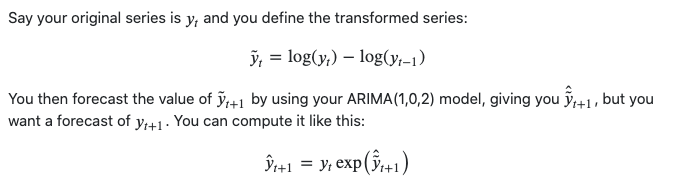

In [324]:
predictions_ARIMA_diff_list = []
for i in range(len( hat_predictions_ARIMA_diff_list)):
  predictions_ARIMA_diff = hat_predictions_ARIMA_diff_list[i] + indexed_dataset_log_sqrt_Scale_list[i].squeeze().shift(periods =1)
  predictions_ARIMA_diff_list.append(predictions_ARIMA_diff)

In [325]:
predictions_ARIMA_diff_list[0]

date
1900-01-01         NaN
1901-01-01    4.265402
1902-01-01    4.268647
1903-01-01    4.270987
1904-01-01    4.273337
                ...   
2017-01-01    4.427175
2018-01-01    4.427869
2019-01-01    4.428543
2020-01-01    4.429206
2021-01-01    4.429859
Length: 122, dtype: float64

In [326]:
for i in range(len(predictions_ARIMA_diff_list)):
  predictions_ARIMA_diff_list[i] = (predictions_ARIMA_diff_list[i])**2

In [327]:
predictions_ARIMA_diff_list[0].head()

date
1900-01-01          NaN
1901-01-01    18.193650
1902-01-01    18.221347
1903-01-01    18.241326
1904-01-01    18.261410
dtype: float64

In [328]:
predictions_ARIMA_log = pd.Series(indexed_dataset_log_sqrt_Scale_list[0].iloc[0:,0])

In [329]:
predictions_ARIMA_log

date
1900-01-01    4.264031
1901-01-01    4.266348
1902-01-01    4.268679
1903-01-01    4.271022
1904-01-01    4.273364
                ...   
2017-01-01    4.427143
2018-01-01    4.427840
2019-01-01    4.428517
2020-01-01    4.429180
2021-01-01    4.429830
Name: population, Length: 122, dtype: float64

In [330]:
predictions_ARIMA_log_list = []
for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
  predictions_ARIMA_log = pd.Series(indexed_dataset_log_sqrt_Scale_list[i].iloc[0:,0])
  predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_list[i], fill_value=0)
  predictions_ARIMA_log_list.append(predictions_ARIMA_log)

In [331]:
predictions_ARIMA_log_list[0]

date
1900-01-01     4.264031
1901-01-01    22.459999
1902-01-01    22.490025
1903-01-01    22.512348
1904-01-01    22.534774
                ...    
2017-01-01    24.027021
2018-01-01    24.033860
2019-01-01    24.040513
2020-01-01    24.047045
2021-01-01    24.053481
Length: 122, dtype: float64

In [332]:
for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
  predictions_ARIMA_log_list[i] = (predictions_ARIMA_log_list[i])**2

In [333]:
predictions_ARIMA_log_list[0]

date
1900-01-01     18.181963
1901-01-01    504.451543
1902-01-01    505.801245
1903-01-01    506.805805
1904-01-01    507.816039
                 ...    
2017-01-01    577.297724
2018-01-01    577.626403
2019-01-01    577.946285
2020-01-01    578.260391
2021-01-01    578.569927
Length: 122, dtype: float64

In [334]:
predictions_ARIMA_list =[]
for i in range(len(predictions_ARIMA_log_list)):
      predictions_ARIMA = np.exp(predictions_ARIMA_diff_list[i])
      predictions_ARIMA_list.append(predictions_ARIMA)

In [335]:
predictions_ARIMA_list[0]

date
1900-01-01             NaN
1901-01-01    7.968965e+07
1902-01-01    8.192761e+07
1903-01-01    8.358092e+07
1904-01-01    8.527656e+07
                  ...     
2017-01-01    3.251761e+08
2018-01-01    3.271796e+08
2019-01-01    3.291408e+08
2020-01-01    3.310782e+08
2021-01-01    3.329990e+08
Length: 122, dtype: float64

In [368]:
def f(x):
  for i in range(len(indexed_df_list)):
    if x == columns[i]:
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_df_list[i], label= "Original" + columns[i])
        plt.plot(predictions_ARIMA_list[i][1:], color='r', label= 'ARIMA ' + columns[i] + " Prediction")
        plt.xlabel("year")
        plt.ylabel(columns[i])
        plt.title(columns[i] + " ARIMA vs Original")
        plt.legend()
        plt.show()

interactive(f, x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

In [337]:
indexed_df_list[0]

,population
date,
1900-01-01,78763706.0
1901-01-01,80336086.0
1902-01-01,81949920.0
1903-01-01,83606240.0
1904-01-01,85296008.0
...,...
2017-01-01,325084736.0
2018-01-01,327096256.0
2019-01-01,329064896.0


In [369]:
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib as mpl
def f(x):
  for i in range(len(results_ARIMA_list)):
    if x == columns[i]:
      with mpl.rc_context():
        mpl.rc("figure", figsize=(15,6))
        plot_predict(results_ARIMA_list[i],1,142)
        plt.show()
      print(results_ARIMA_list[i].summary())
interactive (f, x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

In [339]:
forecast_ARIMA_diff_list = []
for i in range(len(results_ARIMA_list)):
  try:
    forecast_ARIMA_diff = pd.Series(results_ARIMA_list[i].forecast(steps=21, alpha=0.1), copy=True)
    forecast_ARIMA_diff_list.append(forecast_ARIMA_diff)
  except:
    forecast_ARIMA_diff_list.append(None)

In [340]:
forecast_ARIMA_diff_list[0]

2022-01-01    0.000669
2023-01-01    0.000702
2024-01-01    0.000746
2025-01-01    0.000801
2026-01-01    0.000859
2027-01-01    0.000917
2028-01-01    0.000974
2029-01-01    0.001028
2030-01-01    0.001079
2031-01-01    0.001126
2032-01-01    0.001169
2033-01-01    0.001208
2034-01-01    0.001241
2035-01-01    0.001271
2036-01-01    0.001297
2037-01-01    0.001318
2038-01-01    0.001336
2039-01-01    0.001351
2040-01-01    0.001363
2041-01-01    0.001372
2042-01-01    0.001379
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [341]:
indexed_dataset_log_sqrt_Scale_list[0].squeeze().to_list()[-1]

4.429830468130546

In [342]:
##### Test

In [343]:
n_forecast_ARIMA_diff_list = []

for i in range(len(forecast_ARIMA_diff_list)):
  n_forecast =[]
  x = indexed_dataset_log_sqrt_Scale_list[i].squeeze().to_list()[-1]
  try:
    for val in forecast_ARIMA_diff_list[i]:
      n_val = val + x 
      x = n_val
      n_forecast.append(n_val)
  except: 
    n_forecast.append(None)
  n_forecast_ARIMA_diff_list.append(n_forecast)

In [344]:
n_forecast_ARIMA_diff_list[0]

[4.430499215051662,
 4.4312010158961925,
 4.431947389326972,
 4.432748310983492,
 4.433607540691834,
 4.434524376985268,
 4.4354980022139365,
 4.43652632764496,
 4.437605363088326,
 4.438731458289269,
 4.439900577550919,
 4.441108105645034,
 4.442349604789339,
 4.44362081347343,
 4.44491749720392,
 4.446235736307419,
 4.447571990565375,
 4.448922993198239,
 4.450285835103476,
 4.451657985432564,
 4.453037228753198]

In [345]:
n_forecast = []
for i in range(len(n_forecast_ARIMA_diff_list)):
  val_list = []
  try:
    for val in n_forecast_ARIMA_diff_list[i]:
      val = val**2
      val_list.append(val)
  except:
    pass
  n_forecast.append(np.exp(val_list))

In [346]:
n_forecast[0]

array([3.34893556e+08, 3.36982798e+08, 3.39219403e+08, 3.41636406e+08,
       3.44249012e+08, 3.47059381e+08, 3.50069592e+08, 3.53278005e+08,
       3.56677068e+08, 3.60260147e+08, 3.64019188e+08, 3.67943962e+08,
       3.72024404e+08, 3.76250587e+08, 3.80612196e+08, 3.85099470e+08,
       3.89703445e+08, 3.94415626e+08, 3.99228309e+08, 4.04134709e+08,
       4.09128793e+08])

In [347]:
n_forecast_ARIMA_diff_list[0]

[4.430499215051662,
 4.4312010158961925,
 4.431947389326972,
 4.432748310983492,
 4.433607540691834,
 4.434524376985268,
 4.4354980022139365,
 4.43652632764496,
 4.437605363088326,
 4.438731458289269,
 4.439900577550919,
 4.441108105645034,
 4.442349604789339,
 4.44362081347343,
 4.44491749720392,
 4.446235736307419,
 4.447571990565375,
 4.448922993198239,
 4.450285835103476,
 4.451657985432564,
 4.453037228753198]

In [348]:
np.exp(n_forecast_ARIMA_diff_list[0])

array([83.9733272 , 84.03228043, 84.09502331, 84.16240381, 84.23474973,
       84.31201462, 84.39414289, 84.48097217, 84.57217934, 84.66746931,
       84.76651356, 84.86893333, 84.97436347, 85.08245231, 85.1928489 ,
       85.3052275 , 85.41929317, 85.53477284, 85.65142269, 85.76902998,
       85.88740796])

In [349]:
######

In [350]:
for i in range(len(forecast_ARIMA_diff_list)):
  try:
    forecast_ARIMA_diff_list[i] = (forecast_ARIMA_diff_list[i])**2
  except:
    pass

In [351]:
forecast_ARIMA_diff_list[0].head()

2022-01-01    4.472224e-07
2023-01-01    4.925244e-07
2024-01-01    5.570733e-07
2025-01-01    6.414755e-07
2026-01-01    7.382757e-07
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [352]:
forecast_ARIMA_list =[]
for i in range(len(forecast_ARIMA_diff_list)):
    try:
      forecast_ARIMA = np.exp(forecast_ARIMA_diff_list[i])
      forecast_ARIMA_list.append(forecast_ARIMA)
    except:
      pass

In [353]:
forecast_ARIMA_list[0] 

2022-01-01    1.000000
2023-01-01    1.000000
2024-01-01    1.000001
2025-01-01    1.000001
2026-01-01    1.000001
2027-01-01    1.000001
2028-01-01    1.000001
2029-01-01    1.000001
2030-01-01    1.000001
2031-01-01    1.000001
2032-01-01    1.000001
2033-01-01    1.000001
2034-01-01    1.000002
2035-01-01    1.000002
2036-01-01    1.000002
2037-01-01    1.000002
2038-01-01    1.000002
2039-01-01    1.000002
2040-01-01    1.000002
2041-01-01    1.000002
2042-01-01    1.000002
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [370]:
import seaborn as sns
def f(x):
  for i in range(len(results_ARIMA_list)):
    if x == columns[i]:
      try:
        plt.figure(figsize=(15,6), dpi=80)
        plt.plot(indexed_df_list[i], label='Original')
        #sns.lineplot(forecast_ARIMA_diff_list[i].index,n_forecast[i],ci=95, label="Forecast")
        plt.legend()
        plt.show()
      except:
        print("Not enough information could not predict")

interactive(f,x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

In [371]:
def f(x):
  for i in range(len(results_ARIMA_list)):
    if x == columns[i]:
      try:
        plt.figure(figsize=(15,6), dpi=80)
        #plt.plot(indexed_df_list[i], label='Original')
        sns.lineplot(forecast_ARIMA_diff_list[i].index,forecast_ARIMA_list[i],ci=95, label="Forecast")
        plt.legend()
        plt.show()
      except:
        print("Not enough information could not predict")

interactive(f,x=columns)

interactive(children=(Dropdown(description='x', options=('population', 'gdp', 'greenhouse_gas_emissions', 'ele…

In [277]:
AR_series_list =[]
results_ARIMA_list =[]
for i in range(len(indexed_dataset_log_sqrt_Scale_list)):
  try:
    model = ARIMA(indexed_dataset_log_sqrt_Scale_list[i], order=(p_list[i],0, q_list[i]))
    results_AR = model.fit()
    AR_series_list.append(results_AR.fittedvalues)
    results_ARIMA_list.append(results_AR)
  except: 
    AR_series_list.append(None)
    results_ARIMA_list.append(None)

In [278]:
hat_predictions_ARIMA_diff_list = []
for i in range(len(AR_series_list)):
  predictions_ARIMA_diff = pd.Series(AR_series_list[i] , copy=True) 
  hat_predictions_ARIMA_diff_list.append(predictions_ARIMA_diff)